# Finding the funniest caption

The visualizations in this notebook attempt to show how quickly a "best caption" rises to the top of the rankings. We perform two visualizations.
1. The graph titled "# Captions within 95% CI of Current Funniest" provides a visualization for how soon *a* caption (not necessarily the *true* funniest caption) can plausibly be identified as the funniest. First, the average user-provided rating is computed for each caption. Then, a 95% CI is computed for each of these average user-provided ratings (basically using the central limit theorem). The corresponding graph displays the number of captions with a 95% CI intersecting the 95% CI around the caption with the highest average user-provided rating.
1. The graph titled "# Captions with Simulated Rating Higher than True Funniest" provides a visualization for how quickly the funniest caption can be correctly identified. the following. Recall that we have access to the ground truth for which caption is funniest. This graph displays how many captions, after a given number of queries, have recieved an average user-provided rating that is better than the average user-provided rating received by the true funniest caption.

Each visualization is performed for three different learning strategies.
1. "Random" randomly selects captions for users to rate.
1. "Active" adaptively chooses captions for users to rate according to the upper confidence bound strategy described in https://arxiv.org/abs/1312.7308.
1. "lil_KLUCB" adaptively chooses captions for users to rate according to the upper confidence bound strategy described in https://arxiv.org/abs/1709.03570.

The line on each graph is a plot of the mean, taken over 10 samples. The shaded region around each line is the standard deviation.

In [ ]:
!python simulation-finding-funniest.py

In [1]:
import pandas as pd
import seaborn as sns
import viz

In [2]:
import pandas as pd
import seaborn as sns
def list_to_csv(input_list, save_name):
    df = pd.DataFrame(input_list)
    df.to_csv(save_name)
    
def csv_to_dataframe(input_csv):
    return pd.read_csv(input_csv)

In [3]:
df = csv_to_dataframe("seaborn_test_huge2.csv")

(0.8, 11867.903583496167)

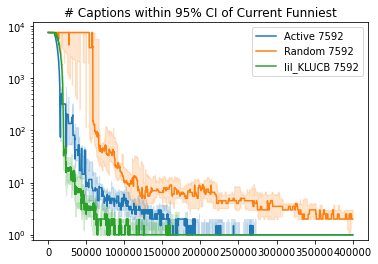

In [4]:
ax = viz.lineplot(
    x="num_queries",
    y="num_funniest",
    hue="sampler",
    ci=.25,
    data=df,
    palette = sns.color_palette()
)
ax.set_yscale("log")
# ax.set_xscale("log")
ax.set_title("# Captions within 95% CI of Current Funniest")
ax.set_ylim(bottom=.8)

(0.8, 11867.903583496167)

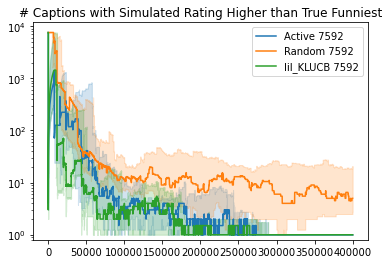

In [5]:
ax = viz.lineplot(
    x="num_queries",
    y="num_geq_funniest",
    hue="sampler",
    ci=.25,
    data=df,
    palette = sns.color_palette()
)
ax.set_yscale("log")
# ax.set_xscale("log")
ax.set_title("# Captions with Simulated Rating Higher than True Funniest")
ax.set_ylim(bottom=.8)